In [1]:
import pandas as pd
import numpy as np

%matplotlib inlinef
import matplotlib.pyplot as plt
import os 

In [2]:
df = pd.read_csv('DATA_keras/RSCCASN.csv')#,index_col='DATE',parse_dates=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   DATE     334 non-null    object
 1   RSCCASN  334 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.3+ KB


# since the date field is  a string object , we  need to do pasrse_dates= True , 
# thru which pandas will auotmatically convert string to  date/ timestamp

In [4]:
df = pd.read_csv('DATA_keras/RSCCASN.csv',index_col='DATE',parse_dates=True)

In [5]:
df.head(10)

,RSCCASN
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
1992-06-01,9182
1992-07-01,9103
1992-08-01,10513
1992-09-01,9573


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 334 entries, 1992-01-01 to 2019-10-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   RSCCASN  334 non-null    int64
dtypes: int64(1)
memory usage: 5.2 KB


In [7]:
df.count()

RSCCASN    334
dtype: int64

# rename  the dataframe columns

In [8]:
df.rename(columns={'RSCCASN':'Sales'},inplace=True)

In [9]:
df.head(3)

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475


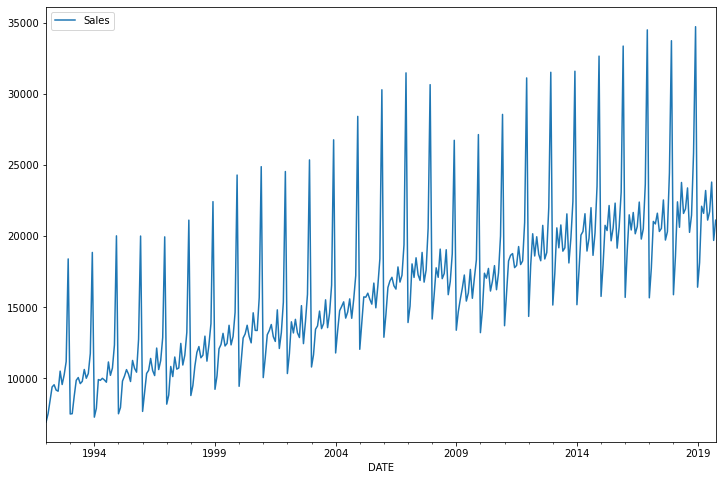

In [10]:
df.plot(figsize=(12,8))

# train test split

In [11]:
len(df)

334

#  data seems to be monthly , lets forecast 1.5 years int fueture 

In [12]:
len(df)-18

316

In [13]:
test_size=18

In [14]:
test_ind= len(df)-18

In [15]:
test_ind

316

In [16]:
train = df.iloc[:test_ind]
test=df.iloc[test_ind:]

In [17]:
train.head(5)

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


In [18]:
test.head(7)

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831


# scale data 

In [19]:
from sklearn.preprocessing  import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(train)

MinMaxScaler()

In [22]:
scaled_train = scaler.transform(train)
scaled_test=scaler.transform(test)

# time series generator 

# This class takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as stride, 
# length of history, etc., to produce batches for training/validation

In [23]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [24]:
# Let's redefine to get 12 months back and then predict the next month out
length =12
generator =  TimeseriesGenerator(scaled_train , scaled_train ,  length=length ,  batch_size=1)

In [25]:
generator[0] , len(generator[0])

((array([[[0.        ],
          [0.02127505],
          [0.05580163],
          [0.08942056],
          [0.09512053],
          [0.08146965],
          [0.07860151],
          [0.12979233],
          [0.09566512],
          [0.1203892 ],
          [0.15426227],
          [0.41595266]]]),
  array([[0.02047633]])),
 2)

# next step  is  to find about batches 

# somethig to keep in mind is  I will add  an early stopping  and a validation generator 

# because of that ,  I need to make sure  that my actual length  of my batch is  less than  the length of my test set 

In [26]:
len(test)

18

# so i cannot feed a batch of 18 months  and then expect a prediction of 19th month with my test set , hence my batch length should be shorter than 18 |
# they can be 17 , 18 , 13  etc , however , a  perfect length  for my batch is 12 , because that is a whole year 

In [27]:
length =12
generator = TimeseriesGenerator(scaled_train , scaled_train ,length =length , batch_size=1 )

In [28]:
x , y = generator[0]

In [29]:
x , x.flatten()

(array([[[0.        ],
         [0.02127505],
         [0.05580163],
         [0.08942056],
         [0.09512053],
         [0.08146965],
         [0.07860151],
         [0.12979233],
         [0.09566512],
         [0.1203892 ],
         [0.15426227],
         [0.41595266]]]),
 array([0.        , 0.02127505, 0.05580163, 0.08942056, 0.09512053,
        0.08146965, 0.07860151, 0.12979233, 0.09566512, 0.1203892 ,
        0.15426227, 0.41595266]))

In [30]:
len(x)  , x.shape

(1, (1, 12, 1))

In [31]:
len(x.flatten())

12

In [32]:
x1=x.flatten()

In [33]:
x1.shape

(12,)

#  now time to start deifing our batches ,
# something to keep in min is that i will add  an early stopping  ad a validation generator  because  
# because of that  , I need to make sure  that my actual length of my batch  is less than  the length of  my test set 

# recall my current test set is 18 months
# so i canot feed a  batch of 18 months and then expect  to get a prediction  of the 19th month  with my   test set . So my batches should be shorter than 18 
# a pretty reasonable choice for my batch  size is 12 months 

In [34]:
len(test)

18

In [35]:
# hence i cannot expect a  batch of 18 months 

# heree length =12 , and here ength represents  the length of teh actual batches 
# Let's redefine to get 12 months back and then predict the next month out
 # source of x point , coming from scaled_train
## source of y  also coming from scaled_train 
## length of the batch = 12 months  and as far as how many we are going  to be passing each time is bagtch size
    
length =12
generator =  TimeseriesGenerator(scaled_train , scaled_train ,  length=length ,  batch_size=1)

# lets take a look at the very first batch 

In [36]:
X  , y = generator[0]

In [37]:
x.flatten() , y

(array([0.        , 0.02127505, 0.05580163, 0.08942056, 0.09512053,
        0.08146965, 0.07860151, 0.12979233, 0.09566512, 0.1203892 ,
        0.15426227, 0.41595266]),
 array([[0.02047633]]))

In [38]:
x_1 , y_1 = generator[1]

# check the next batch 

In [39]:
x_1.flatten()

array([0.02127505, 0.05580163, 0.08942056, 0.09512053, 0.08146965,
       0.07860151, 0.12979233, 0.09566512, 0.1203892 , 0.15426227,
       0.41595266, 0.02047633])

In [40]:
y_1

array([[0.02127505]])

# we now have time serie sgenetator and data ahs been scaled

# create the model 

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM 

# we are using only 1 feature  , essetially the previous  sales data 

In [42]:
n_features=1

In [43]:
#inpiut_shape= length of batch * nuimber of features 
model= Sequential()
model.add(LSTM(units=100  , activation ='relu' ,input_shape=(length,n_features)))
# we need to make sure we  add a  final dense layer  to have one final predictive output 
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
## loss is mse ,  mean squared error , since we  are workng on continuous  sales data 

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100)               40800     
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


# as suggested earlier , recurrent neural networks  take a really longer time to train  
# and  it may take many epochs  fr training 
# so it would be nice to take an early stopping mechanism 
# so i can set an  arbritrarily  hugh number of  epochs  qnd let tensorlfow decide  and do teh work of figuring out 
# when to stop training 
## we ll do  that  by saying  fro tensorflow  that carries   callbacks import 

In [45]:
from tensorflow.keras.callbacks import EarlyStopping

In [46]:
early_stop =EarlyStopping(monitor='val_loss',patience=2)

In [47]:
early_stop , type(early_stop)

(<tensorflow.python.keras.callbacks.EarlyStopping at 0x1e85655ba48>,
 tensorflow.python.keras.callbacks.EarlyStopping)

In [48]:
# its time to cerate validation generator 

validation_generator=TimeseriesGenerator(scaled_test , scaled_test,length =length , batch_size=1)

# this is just a carbon copy of  our prevoous time series generatyor , 
# except this time , we will be passing  the test data instead of train data 

In [49]:
model.fit_generator(generator, epochs =20 , validation_data= validation_generator , callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 304 steps, validate for 6 steps
Epoch 1/20
304/304 [==============================] - 5s 15ms/step - loss: 0.0231 - val_loss: 0.0071
Epoch 2/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0167 - val_loss: 0.0038
Epoch 3/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0138 - val_loss: 0.0100
Epoch 4/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0045 - val_loss: 0.0022
Epoch 5/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 6/20
304/304 [==============================] - 3s 11ms/step - loss: 0.0019 - val_loss: 0.0045.00


# in my notebook , it took around  6 , epochs  to finish training 

In [50]:
losses=pd.DataFrame(model.history.history)

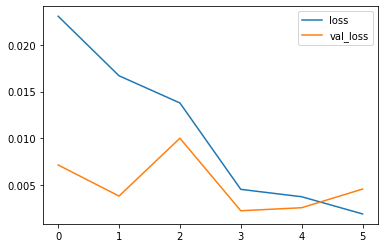

In [51]:
losses.plot()

# looks like there was quite a bit of noise and then we went down to our original value , that was kind of minimum , that is around 3 epochs 

# patience is added  becasue there can be bit of noise  in the model  traning in the beginning 
# ,   if  there is too much patience ,  then later too much of noise can be added , hence it kind of balanace 

In [55]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

In [56]:
# first check  few things 

# check first_Eval_batch

print(f"Checking the first-eval_batch {first_eval_batch}")


print(f"Checking the current_batch {current_batch}")

Checking the first-eval_batch [[0.53252977]
 [0.48591345]
 [0.49364653]
 [0.56629393]
 [0.46405751]
 [0.48536886]
 [0.63534708]
 [0.97233517]
 [0.32468051]
 [0.42285071]
 [0.5615016 ]
 [0.49658728]]
Checking the current_batch [[[0.53252977]
  [0.48591345]
  [0.49364653]
  [0.56629393]
  [0.46405751]
  [0.48536886]
  [0.63534708]
  [0.97233517]
  [0.32468051]
  [0.42285071]
  [0.5615016 ]
  [0.49658728]]]


In [60]:
print(f" shape of first_eval_batch:{first_eval_batch.shape} \n . Shape of current_batch:   {current_batch.shape}")

 shape of first_eval_batch:(12, 1) 
 . Shape of current_batch:   (1, 12, 1)


In [61]:
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    ## for each and every loop of i , the time windows get shifted by 1 unit 
    current_pred = model.predict(current_batch)[0]
    print(f"printing the current_batch[0] : {current_batch[0]}")
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

printing the current_batch[0] : [[0.53252977]
 [0.48591345]
 [0.49364653]
 [0.56629393]
 [0.46405751]
 [0.48536886]
 [0.63534708]
 [0.97233517]
 [0.32468051]
 [0.42285071]
 [0.5615016 ]
 [0.49658728]]
printing the current_batch[0] : [[0.48591345]
 [0.49364653]
 [0.56629393]
 [0.46405751]
 [0.48536886]
 [0.63534708]
 [0.97233517]
 [0.32468051]
 [0.42285071]
 [0.5615016 ]
 [0.49658728]
 [0.57970011]]
printing the current_batch[0] : [[0.49364653]
 [0.56629393]
 [0.46405751]
 [0.48536886]
 [0.63534708]
 [0.97233517]
 [0.32468051]
 [0.42285071]
 [0.5615016 ]
 [0.49658728]
 [0.57970011]
 [0.53589702]]
printing the current_batch[0] : [[0.56629393]
 [0.46405751]
 [0.48536886]
 [0.63534708]
 [0.97233517]
 [0.32468051]
 [0.42285071]
 [0.5615016 ]
 [0.49658728]
 [0.57970011]
 [0.53589702]
 [0.54612982]]
printing the current_batch[0] : [[0.46405751]
 [0.48536886]
 [0.63534708]
 [0.97233517]
 [0.32468051]
 [0.42285071]
 [0.5615016 ]
 [0.49658728]
 [0.57970011]
 [0.53589702]
 [0.54612982]
 [0.618448

In [62]:
print(f" printing the test_predictions :\n :{test_predictions}")

 printing the test_predictions :
 :[array([0.5797001], dtype=float32), array([0.535897], dtype=float32), array([0.5461298], dtype=float32), array([0.6184486], dtype=float32), array([0.5245269], dtype=float32), array([0.54818076], dtype=float32), array([0.70106053], dtype=float32), array([1.0725417], dtype=float32), array([0.38678566], dtype=float32), array([0.47842762], dtype=float32), array([0.6150779], dtype=float32), array([0.5544493], dtype=float32), array([0.6361127], dtype=float32), array([0.59639513], dtype=float32), array([0.6086628], dtype=float32), array([0.6791384], dtype=float32), array([0.5943755], dtype=float32), array([0.6201893], dtype=float32)]


# inverse transformations and compare 

In [64]:
correct_test_predictions= scaler.inverse_transform(test_predictions)

In [65]:
correct_test_predictions

array([[22905.25989437],
       [21698.74742317],
       [21980.5998373 ],
       [23972.5486536 ],
       [21385.56877089],
       [22037.0908246 ],
       [26248.01133537],
       [36480.08896255],
       [17591.62411475],
       [20115.81033063],
       [23879.70603037],
       [22209.75206566],
       [24459.08793259],
       [23365.1075964 ],
       [23703.00772524],
       [25644.18869591],
       [23309.47852802],
       [24020.49433041]])

In [66]:
test

,Sales
DATE,
2018-05-01,23764
2018-06-01,21589
2018-07-01,21919
2018-08-01,23381
2018-09-01,20260
2018-10-01,21473
2018-11-01,25831
2018-12-01,34706
2019-01-01,16410


In [67]:
test['True_predictions']=correct_test_predictions

C:\Anacon\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
test

,Sales,True_predictions
DATE,,
2018-05-01,23764,22905.259894
2018-06-01,21589,21698.747423
2018-07-01,21919,21980.599837
2018-08-01,23381,23972.548654
2018-09-01,20260,21385.568771
2018-10-01,21473,22037.090825
2018-11-01,25831,26248.011335
2018-12-01,34706,36480.088963
2019-01-01,16410,17591.624115


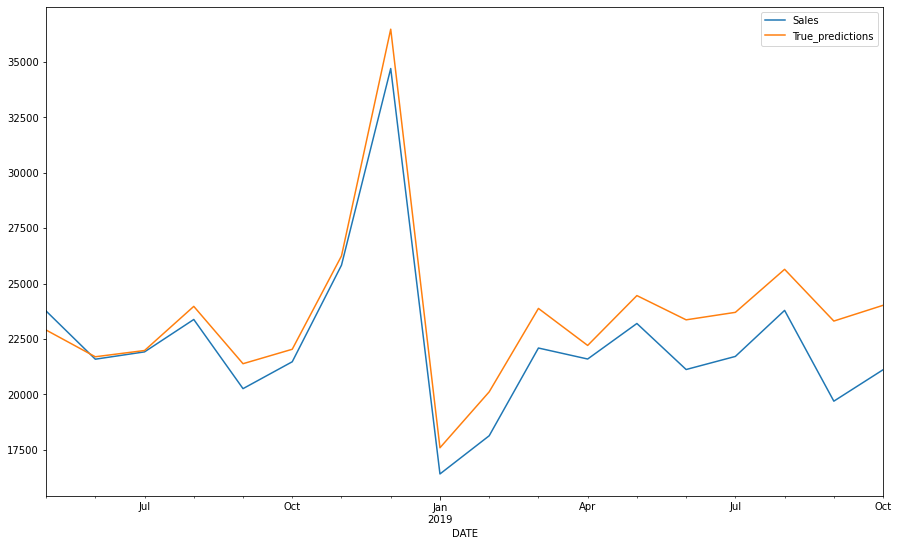

In [70]:
test.plot(figsize=(15,9))

# the above network does not have a true understanding of things like december is a holiday , where there can be a peak of sales ,
# instead it is learning  based of   the previous  cycles  what the trends should be 
# also  , seasonality is  almost taken care of 
 ## another thing we can expriement  is , we  can try to use default activation of LSTM , instead of sending it 
# instead of sending   it to RELU  and see if it improves  our results 

## so there is a lot of  different options  we can play  with removing  or adding roe neuerons  t the lstm neuron layers 
#  but lets go ahead  and try to forecast  into the unknown future 
# what we will do is to retrain  on our data ,  and then again do our scaling 
# do a retraining  and then do a true forecast

# retrain and forecasting

In [73]:
# i will scale my entore data set 
full_scaler= MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [74]:
length =12## length of  output sequences  in number of targets 
generator =TimeseriesGenerator(scaled_full_data ,  scaled_full_data ,  length=length ,  batch_size=1)

#  re-create the model 

In [76]:
model = Sequential()
model.add(LSTM(100,  activation ='relu', input_shape=(length , n_features)))
model.add(Dense(1))
model.compile(optimizer= 'adam', loss='mse')

# a  commn question now : how many epochs should I be choosing and why cant just do an early stop call back again 
# when i am forecasting into unknown future , after retraining my  model 

# recall , early stopping works  the way is it evaluates the validatio loss
# recall the validation generator works on data that the model does not get to train on 
## however by definition of this forecast , we are training on whole data 
## hence here is no cncpet  of early stopping  / validation 

 # PLEASE NOTE , we are now forecasting into totally unknown future

# since from the above loss diagram , we got least number of epochs  at epoch =3  during testing  phase, hence we   choose 3 

In [77]:
model.fit_generator(generator , epochs =3)

  ...
    to  
  ['...']
Train for 322 steps
Epoch 1/3
322/322 [==============================] - 5s 16ms/step - loss: 0.0249: 0s - loss
Epoch 2/3
322/322 [==============================] - 4s 11ms/step - loss: 0.0164
Epoch 3/3
322/322 [==============================] - 4s 11ms/step - loss: 0.0085


In [78]:
forecast = []
# Replace periods with whatever forecast length you want
periods = 12

first_eval_batch = scaled_full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [79]:
forecast = scaler.inverse_transform(forecast)

In [80]:
forecast

array([[29411.1503644 ],
       [38547.79142284],
       [19467.77207112],
       [20788.26388025],
       [24012.95705462],
       [23718.90807724],
       [25210.21990442],
       [23589.01114893],
       [24281.373384  ],
       [26235.70313311],
       [23297.142416  ],
       [26417.92921162]])

# Creating new timestamp index with pandas. 

In [81]:
df

,Sales
DATE,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2019-06-01,21123
2019-07-01,21714
2019-08-01,23791


In [82]:
forecast_index=pd.date_range(start='2019-11-01',periods=periods,freq='MS')

In [83]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [84]:
forecast_df

,Forecast
2019-11-01,29411.150364
2019-12-01,38547.791423
2020-01-01,19467.772071
2020-02-01,20788.263880
2020-03-01,24012.957055
2020-04-01,23718.908077
2020-05-01,25210.219904
2020-06-01,23589.011149
2020-07-01,24281.373384
2020-08-01,26235.703133


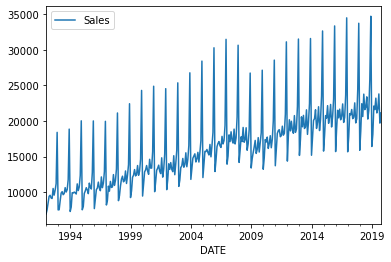

In [86]:
df.plot()

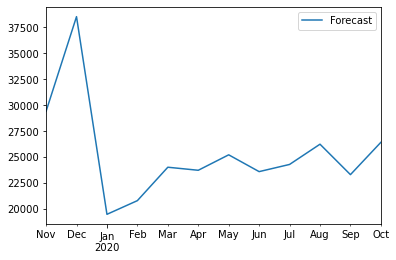

In [87]:
forecast_df.plot()

# joining pandas plots 
# https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

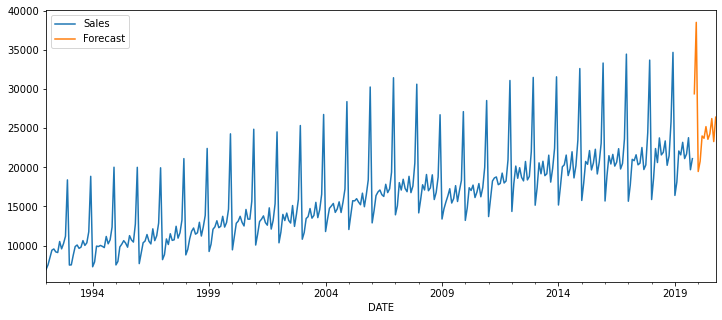

In [90]:
ax=df.plot()
forecast_df.plot(ax=ax, figsize=(12,5))



# constructing the time series plot between  1st jan 2018  till 1st december 2020

(576.0, 611.0)

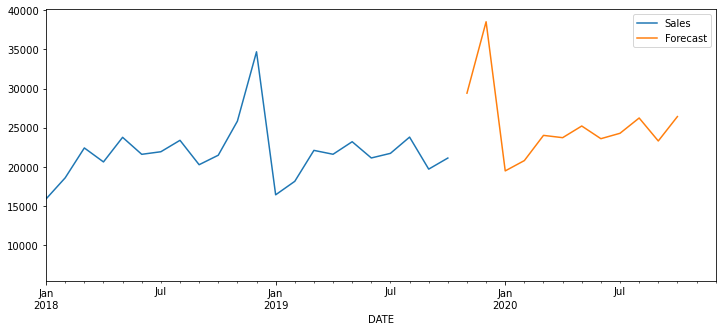

In [91]:
ax=df.plot()
forecast_df.plot(ax=ax, figsize=(12,5))
plt.xlim('2018-01-01','2020-12-01')